# Ion excitation with a short Fourier-limited Gaussian laser pulse
CERN, 2021

From the Mathematica notebook of Simon Rochester:

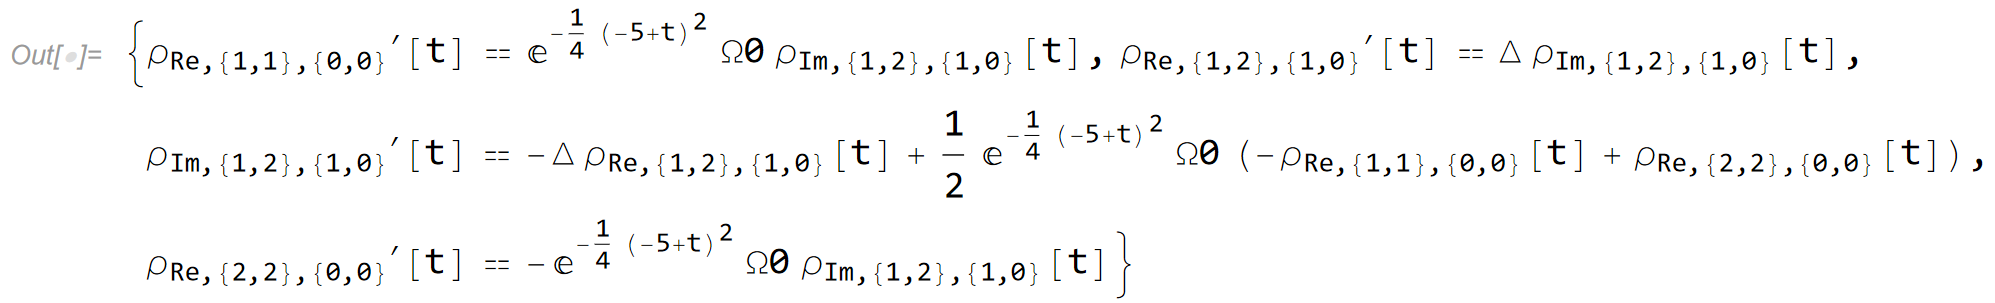

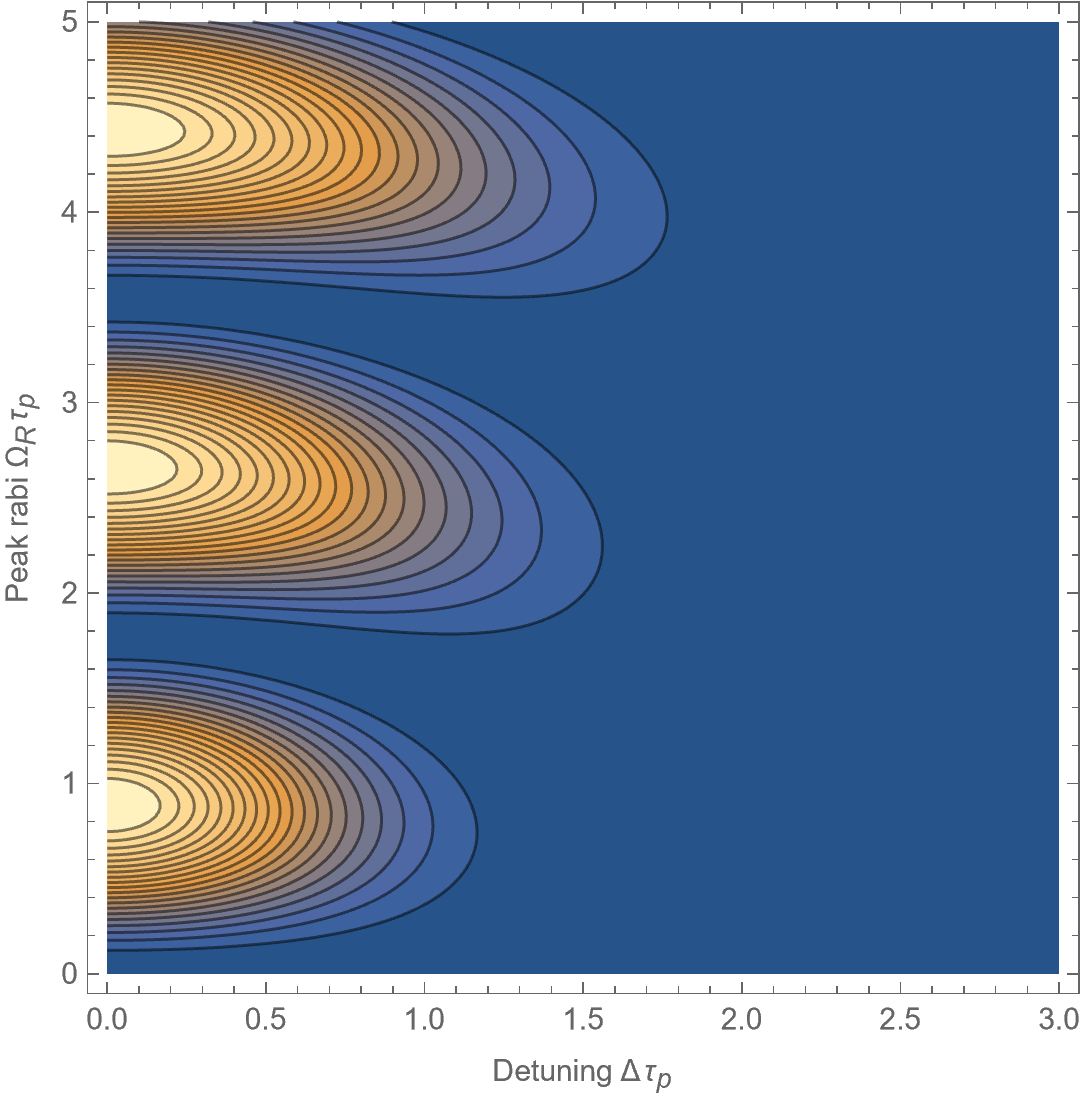

Let's use numeric integration to solve this system of equations:

In [8]:
import numpy as np
from scipy.integrate import solve_ivp

Initial values:

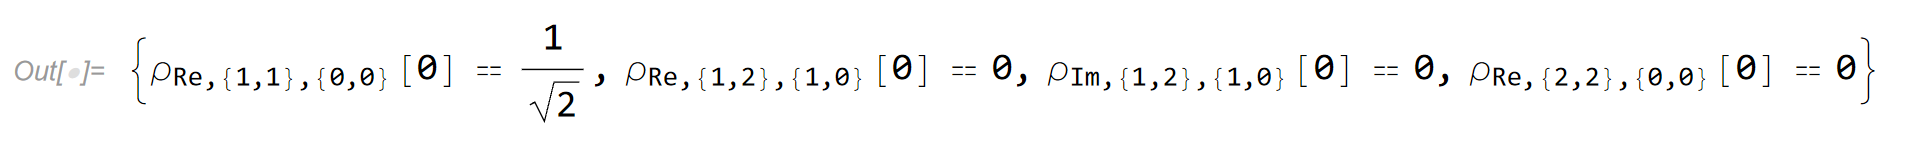

In [9]:
rhoRe1100 = 1/np.sqrt(2);
rhoRe1210 = 0
rhoIm1210 = 0
rhoRe2200 = 0
rho0 = np.array([rhoRe1100,rhoRe1210,rhoIm1210,rhoRe2200])

We solve the equation
$$
\frac{d\boldsymbol{\rho}}{dt} = \boldsymbol{F}(t,\boldsymbol{\rho}).
$$

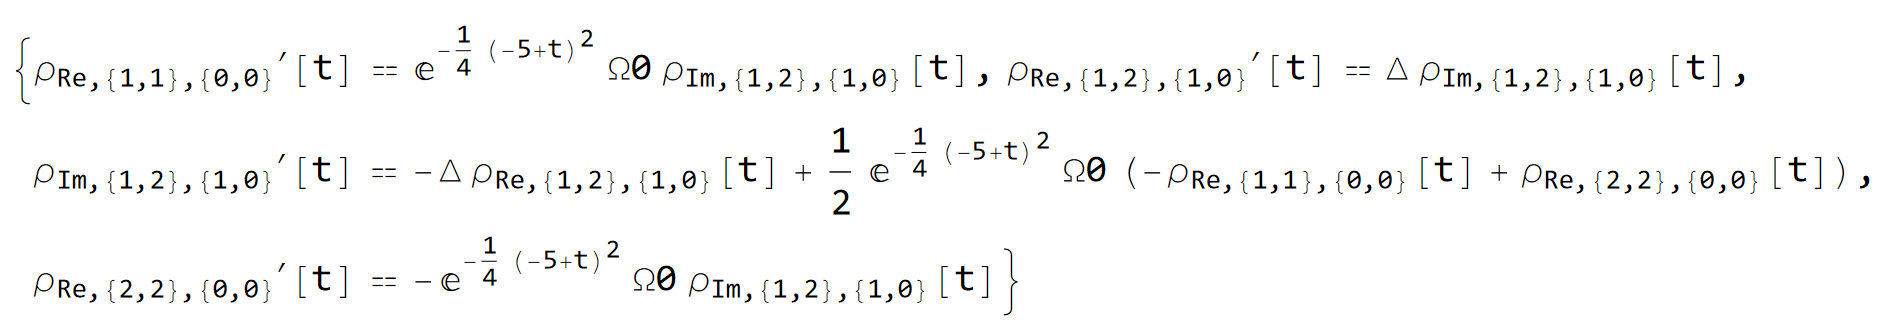

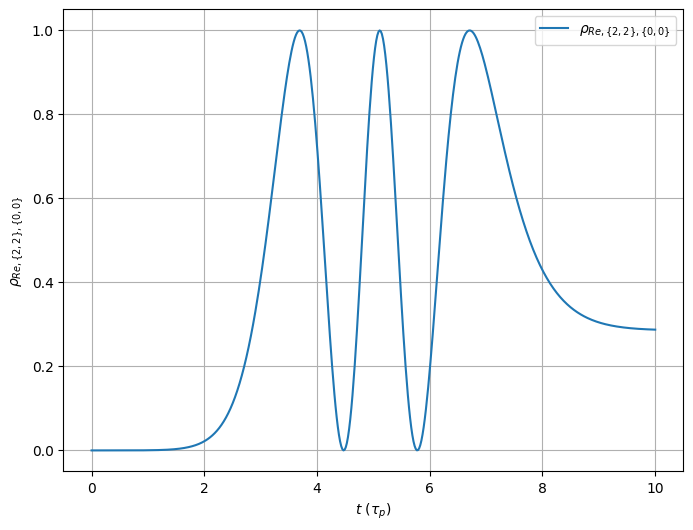

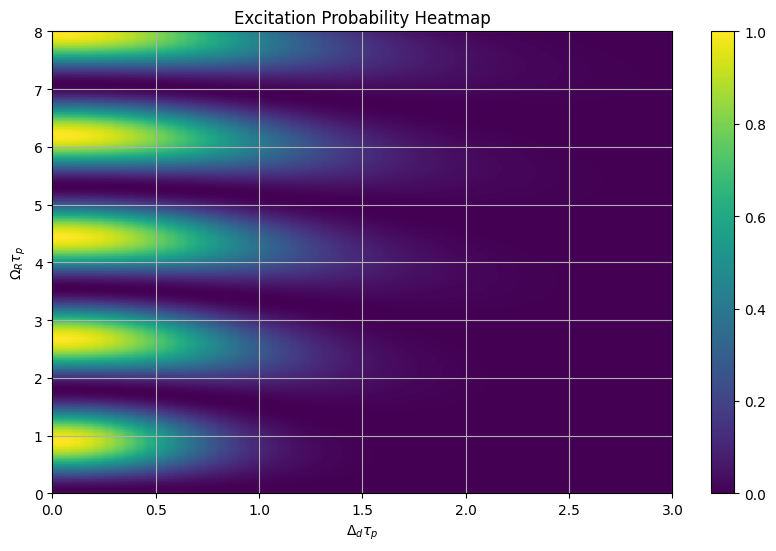

Saved.


In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Initial values:
rhoRe1100 = 1 / np.sqrt(2)
rhoRe1210 = 0
rhoIm1210 = 0
rhoRe2200 = 0
rho0 = np.array([rhoRe1100, rhoRe1210, rhoIm1210, rhoRe2200])

# We solve the equation
Delta = 0
Omega0 = 5


def F(t, rho):
    rhoRe1100 = rho[0]
    rhoRe1210 = rho[1]
    rhoIm1210 = rho[2]
    rhoRe2200 = rho[3]
    Exp = np.exp(-(1 / 4) * (-5 + t) ** 2)
    return np.array([
        Exp * Omega0 * rhoIm1210,
        Delta * rhoIm1210,
        -Delta * rhoRe1210 + 0.5 * Exp * Omega0 * (-rhoRe1100 + rhoRe2200),
        -Exp * Omega0 * rhoIm1210
    ])


t_span = (0, 10)  # sec
t_eval = np.linspace(t_span[0], t_span[1], 500)  # points of output

sol = solve_ivp(F, t_span, rho0, t_eval=t_eval, rtol=1e-4)

# Plot the evolution
plt.figure(figsize=(8, 6))
plt.plot(t_eval, sol.y[3] * np.sqrt(2), label=r'$\rho_{Re,\{2,2\},\{0,0\}}$')
plt.xlabel(r"$t\ (\tau_p)$")
plt.ylabel(r"$\rho_{Re,\{2,2\},\{0,0\}}$")
plt.legend()
plt.grid(True)
plt.show()

# Map of resulting excitation as a function of Δd and Ω0
def excite_ion(newDelta, newOmega0):
    global Delta
    Delta = newDelta
    global Omega0
    Omega0 = newOmega0
    sol = solve_ivp(F, t_span, rho0, rtol=1e-4)
    rhoRe1100, rhoRe1210, rhoIm1210, rhoRe2200 = sol.y
    return rhoRe2200[-1] * np.sqrt(2)


Delta_range = np.linspace(0, +3, 30)
Omega0_range = np.linspace(0, +8, 80)
Delta_range = np.linspace(0, +3, 60)
Omega0_range = np.linspace(0, +8, 160)

Deltas, Omega0s = np.meshgrid(Delta_range, Omega0_range)

Excitation = np.vectorize(excite_ion)(Deltas, Omega0s)

# # Contour plot of excitation probability
# plt.figure(figsize=(10, 6))
# contour = plt.contourf(Deltas, Omega0s, Excitation, cmap='Reds', levels=np.linspace(0, 1, 100))
# cbar = plt.colorbar(contour)
# plt.xlabel(r"$\Delta_d\tau_p$")
# plt.ylabel(r"$\Omega_R\tau_p$")
# plt.title("Excitation Probability")
# plt.grid(True)
# plt.show()

# Heatmap version
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(Excitation, extent=[0, Delta_range[-1], 0, Omega0_range[-1]], origin='lower',
                     cmap='viridis', aspect='auto', vmin=0, vmax=1)
plt.colorbar(heatmap)
plt.xlabel(r"$\Delta_d\tau_p$")
plt.ylabel(r"$\Omega_R\tau_p$")
plt.title("Excitation Probability Heatmap")
plt.grid(True)
plt.show()

# Save data in JSON format
import json

with open('map_of_excitation.json', "w") as f:
    json.dump({
        'Delta_detuning*tau_pulse max': Delta_range[-1],
        'OmegaRabi*tau_pulse max': Omega0_range[-1],
        'Excitation probability': Excitation.tolist()
    }, f, indent=1)

print('Saved.')


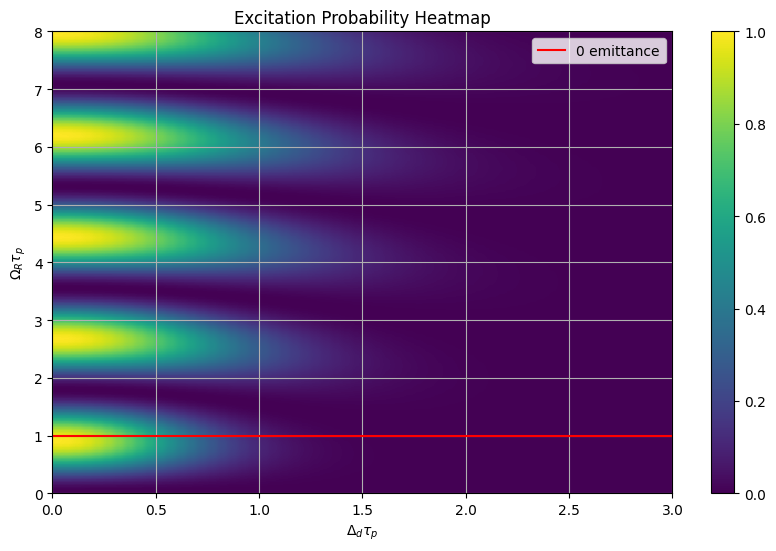

In [17]:
# Heatmap version
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(Excitation, extent=[0, Delta_range[-1], 0, Omega0_range[-1]], origin='lower',
                     cmap='viridis', aspect='auto', vmin=0, vmax=1)
plt.colorbar(heatmap)
# plt.axhline(1.828456e+00,label='0 emittance',color='red')
plt.axhline(1,label='0 emittance',color='red')
plt.xlabel(r"$\Delta_d\tau_p$")
plt.ylabel(r"$\Omega_R\tau_p$")
plt.title("Excitation Probability Heatmap")
plt.grid(True)
plt.legend()
plt.show()